In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
X=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y=np.array([[0],[1],[1],[0],[1],[0],[0],[1]])

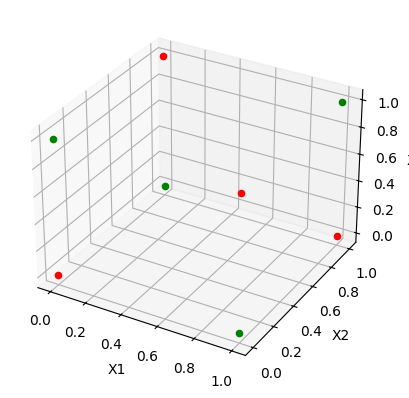

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(Y)):
    if Y[i] == 0:
        ax.scatter(X[i,0], X[i,1], X[i,2], c='r', marker='o')
    else:
        ax.scatter(X[i,0], X[i,1], X[i,2], c='g', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()


In [ ]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons=3
    hiddenLayer1Neurons=10
    hiddenLayer2Neurons=10
    outLayerNeurons=1

    self.learning_rate=0.2
    self.W_H1I=np.random.randn(inputLayerNeurons,hiddenLayer1Neurons)
    self.W_H2H1=np.random.randn(hiddenLayer1Neurons,hiddenLayer2Neurons)
    self.W_OH2=np.random.randn(hiddenLayer2Neurons,outLayerNeurons)

  def sigmoid(self,x,der=False):
    if der==True:
      return x*(1-x)
    else:
      return 1/(1+np.exp(-x))

  def feedForward(self,X):
    hidden1_input=np.dot(X,self.W_H1I)
    self.hidden1_output=self.sigmoid(hidden1_input)

    hidden2_input=np.dot(self.hidden1_output,self.W_H2H1)
    self.hidden2_output=self.sigmoid(hidden2_input)

    output_input=np.dot(self.hidden2_output,self.W_OH2)
    pred=self.sigmoid(output_input)
    return pred

  def  backForward(self,X,Y,pred):
    output_error=Y-pred
    output_delta=self.learning_rate*output_error*self.sigmoid(pred,der=True)

    hidden2_error=output_delta.dot(self.W_OH2.T)
    hidden2_delta=self.learning_rate*hidden2_error*self.sigmoid(self.hidden2_output,der=True)

    hidden1_error=hidden2_delta.dot(self.W_H2H1.T)
    hidden1_delta=self.learning_rate*hidden1_error*self.sigmoid(self.hidden1_output,der=True)

    self.W_H1I+=X.T.dot(hidden1_delta)
    self.W_H2H1+=self.hidden1_output.T.dot(hidden2_delta)
    self.W_OH2+=self.hidden2_output.T.dot(output_delta)
  def train(self,X,Y):
    output=self.feedForward(X)
    self.backForward(X,Y,output)

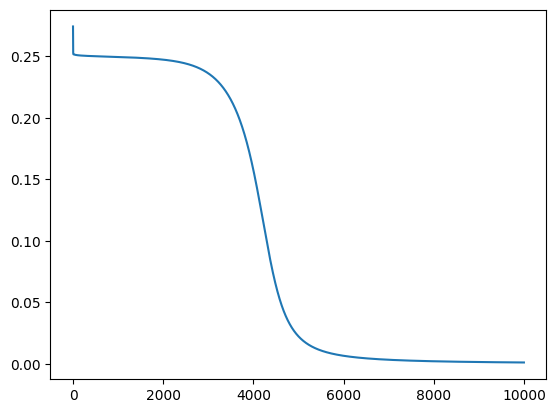

In [ ]:
NN=NeuralNetwork()

err=[]

for i in range(10000):
  NN.train(X,Y)
  err.append(np.mean(np.square(Y-NN.feedForward(X))))
plt.plot(err)

In [ ]:
print(NN.feedForward([0,0,0]))

[0.02789361]


In [ ]:
print(NN.feedForward([0,0,1]))

[0.95909441]


In [ ]:
print(NN.feedForward([0,1,0]))

[0.9656937]


In [ ]:
print(NN.feedForward([0,1,1]))

[0.04372381]


In [ ]:
print(NN.feedForward([1,0,0]))

[0.96485345]


In [ ]:
print(NN.feedForward([1,0,1]))

[0.03627941]


In [ ]:
print(NN.feedForward([1,1,0]))

[0.03152907]


In [ ]:
print(NN.feedForward([1,1,1]))

[0.96954594]
